<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations

Text(0, 0.5, "Value in $1000's")

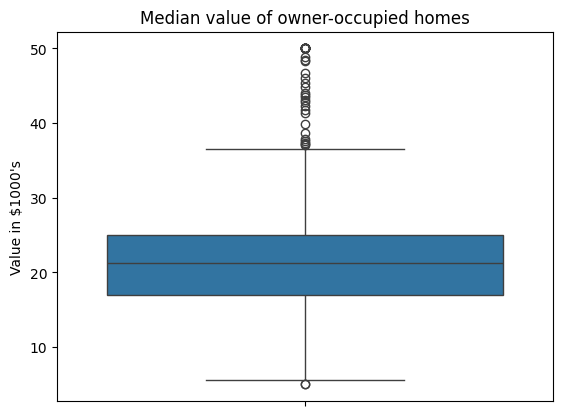

In [17]:
# Median value of owner-occupied homes
ax = sns.boxplot(boston_df['MEDV'])
ax.set_title("Median value of owner-occupied homes")
ax.set_ylabel("Value in $1000's")

#Findings: 
# - The value of owner-occupied homes ranges from 5,000$ to 50,000$.
# - Middle 50% of the owner-occupied homes are valued between 17,000$ and 25,000$.
# - Median price of an owner-occupied home is around 21,000$.
# - There are unusually expensive houses whose median value is above 37,000$ which can be considered as outliers.

35


Text(0.5, 0, 'Bounded by Charles River? 0: No, 1:Yes')

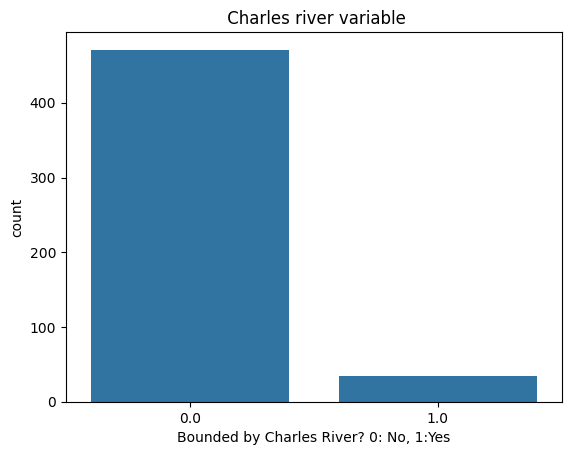

In [21]:
# Bar plot for the Charles river variable
print(len(boston_df[boston_df.CHAS==1]))
ax = sns.countplot(x = 'CHAS',data = boston_df)
ax.set_title(" Charles river variable")
ax.set_xlabel("Bounded by Charles River? 0: No, 1:Yes")
# Findings: 
# - Only a small portion of the houses (35/506) are bounded by the Charles river

Text(0.5, 1.0, 'Box plot - Median variable of house by Age Groups')

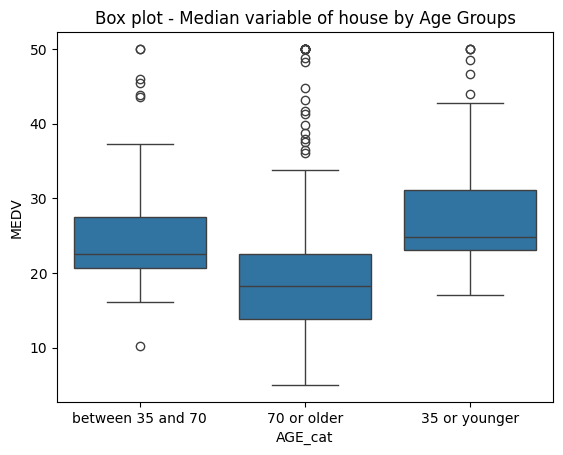

In [26]:
# boxplot for the MEDV variable vs the AGE variable
boston_df.loc[boston_df.AGE<=35, 'AGE_cat'] = "35 or younger"
boston_df.loc[boston_df.AGE.between(35,70), 'AGE_cat'] = "between 35 and 70"
boston_df.loc[boston_df.AGE>=70, 'AGE_cat'] = "70 or older"
ax = sns.boxplot(x='AGE_cat',y='MEDV', data=boston_df)
ax.set_title("Box plot - Median variable of house by Age Groups")
# Findings:
# - Most of the unusually expensive houses are owned by people with age of 70 or older.
# - The ascending order of the age groups by median house price is as follows: 
# 1. 70 or older
# 2. between 35 and 70
# 3. 35 or younger

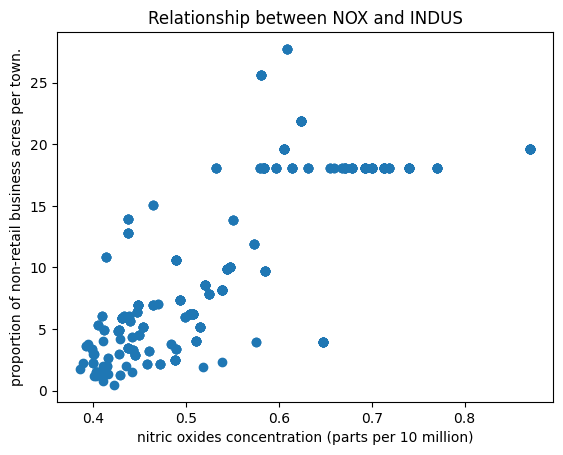

In [28]:
# relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
plt.scatter(boston_df.NOX, boston_df.INDUS)
plt.title("Relationship between NOX and INDUS")
plt.xlabel('nitric oxides concentration (parts per 10 million)')
plt.ylabel('proportion of non-retail business acres per town.')
plt.show()
# Findings:
# - There is a strong positive correlation between NOX and INDUS.
# - It is highly likely that the increase in proportion of non-retail businesses per town leads to increased emission of the nitric oxides gas.

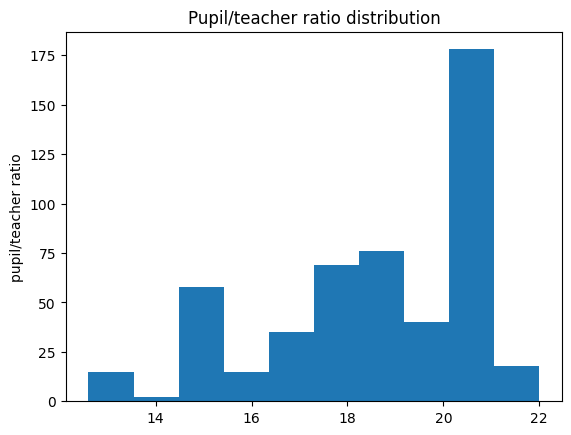

In [29]:
# Histogram for pupil/teacher ratio
plt.hist(boston_df['PTRATIO'])
plt.ylabel('pupil/teacher ratio')
plt.title('Pupil/teacher ratio distribution')
plt.show()
# Findings:
# - the data is not normally distributed. The distribution is skewed to the right. 
# - Majority of the observations have pupil/teacher ratio of 20 or 21

# Task 3: Use the appropriate tests to answer the questions provided

## (1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River and those not bounded

Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River and those not bounded

α = 0.05

In [34]:
# Perform independent t-test
t_stat, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
print("t-stat:", t_stat)
print("P-value:", p_value)
print("test result:","reject null" if p_value <0.05 else "fail to reject null) 

t-stat: 3.996437466090509
P-value: 7.390623170519905e-05
test result: reject null


Conclusion: There is a significant difference in the median house values for homes bounded by the Charles River and those not bounded

## (2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis (H0): The mean median house values are same across all age groups

Alternative Hypothesis (H1): At least one age group has a different mean median house value.

α = 0.05

In [39]:
# ANOVA test
f_stat, p_value = scipy.stats.f_oneway(boston_df[boston_df.AGE_cat=='35 or younger']['MEDV'], 
                           boston_df[boston_df.AGE_cat=='between 35 and 70']['MEDV'], 
                           boston_df[boston_df.AGE_cat=='70 or older']['MEDV'])
print("f-stat:", f_stat)
print("P-value:", p_value)
print("test result:","reject null" if p_value <0.05 else "fail to reject null") 

f-stat: 36.40764999196599
P-value: 1.7105011022702984e-15
test result: reject null


Conclusion: At least one age group has a different mean median house value

## (3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis (H0): There is no significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

Alternative Hypothesis (H1): There is significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

α = 0.05

In [42]:
# Pearson test
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("corr:", corr)
print("P-value:", p_value)
print("test result:","reject null" if p_value <0.05 else "fail to reject null") 

corr: 0.7636514469209192
P-value: 7.913361061210442e-98
test result: reject null


Conclusion: There is significant relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

## (4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis (H0): There is no significant relationship between the weighted distance to employment centers and the median value of owner-occupied homes.

Alternative Hypothesis (H1): There is significant relationship between the weighted distance to employment centers and the median value of owner-occupied homes.

α = 0.05

In [43]:
# Regression analysis
X = boston_df[['DIS']]
X = sm.add_constant(X)
rgeression = sm.OLS(boston_df['MEDV'], X).fit()
print(rgeression.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        21:50:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion: P- value less than 0.05 indicates that there is a significant relationship between independent and dependent variables. For each unit increase in weighted distance to the Boston employment centers results in 1.0916 (1091.6$) increase in median value of the owner occupied homes. 